# Tarea final

In [95]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython import display
from IPython.display import HTML


### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 3
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

Porque en estos valores de r, la f(x) converge a números entre 0 y 1. 

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [30]:
def logistic_map(x,r):
    if r>=0 and r<=3:
        return r*x*(1-x)

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [25]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
import sympy as sym

In [34]:
x = sym.Symbol('x')

2*x*(1-x)-x

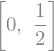

In [29]:
sym.solve(2*x*(1-x)-x,x)

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [37]:
r = sym.Symbol('r')
sym.diff(r*x*(1-x),x)

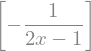

In [39]:
sym.solve(-r*x + r*(1-x)-1,r)

Considerando que x < 1/2:

Para:

$$
 -\frac{1}{1-2x} \leq r \leq  \frac{1}{1-2x}
$$


x < 1/2 es estable. De lo contrario, x es inestable.

Al considerar x > 1/2, para:

$$
\frac{1}{1-2x} \leq r \leq  -\frac{1}{1-2x}
$$

x > 1/2 es estable. De lo contrario, x es inestable.

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [40]:
from ipywidgets import interact, fixed, widgets, IntSlider, interact_manual, FloatSlider

In [138]:
interact(logistic_map, x =FloatSlider(min=0, max=1, step=0.2, value=0), r = FloatSlider(min=0, max=3, step=0.2, value=0))

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.2), FloatSlider(value=0.0, descr…

<function __main__.logistic_map(x, r)>

In [48]:
type(0)

int

In [49]:
type(int)

type

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [139]:
def iterar(g,x0,N,r):
    if N == 0:
        return g(x0,r)
    elif N >= 0:
        return iterar(g,g(x0,r),N-1,r)
    

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [140]:
def iterarLista(g,x0, r, N,lista):
    lista.append(x0)
    if N == 0:
        return lista
    elif N >= 0:
        return iterarLista(g, g(x0,r), r, N-1, lista)

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [141]:
iterar(logistic_map,2,4,0.8)

In [79]:
iterar(logistic_map,2,4,1.2)

In [75]:
iterar(logistic_map,2,4,2.8)

In [76]:
iterar(logistic_map,2,4,3.2)

In [89]:
m = []
iterarLista(logistic_map,2,0.8,4,m)

In [90]:
m = []
iterarLista(logistic_map,2,1.2,4,m)

In [91]:
m = []
iterarLista(logistic_map,2,2.8,4,m)

In [103]:
m = []
iterarLista(logistic_map,2,3,4,m)

## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [117]:
def GrafLogistic_map(r):
    X = np.linspace(0,1, 256, endpoint = True)
    
    fig, ax1 = plt.subplots(1,1)
    
    ax1.set_title('Diagrama de CobWeb',fontsize = 12)
    ax1.set_xlabel("$N_n$",fontsize =11)
    ax1.set_ylabel("$N_n+1$",fontsize=11)
    plt.plot(X,X);
    plt.plot(X, logistic_map(X,r))

interactive(children=(FloatSlider(value=0.0, description='r', max=3.0, step=0.2), Output()), _dom_classes=('wi…

<function __main__.GrafLogistic_map(r)>

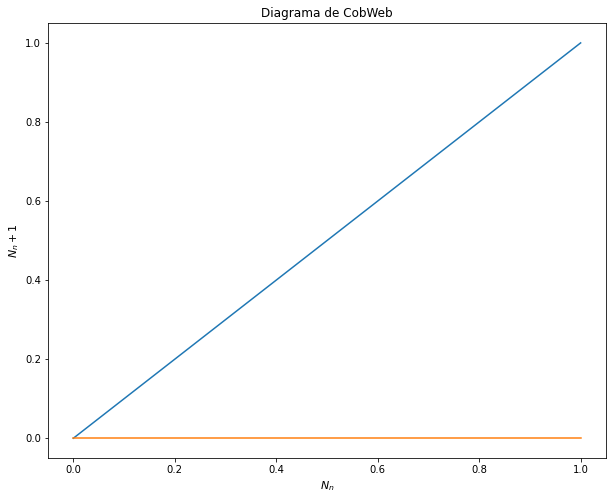

In [142]:
interact(GrafLogistic_map, r = FloatSlider(min=0, max=3, step=0.2, value=0))

Se puede observar que mientras más crece la r, más parabólica se convierte la función.

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

In [147]:
def Segmentos(n,g,x0,r,x,y):
    x.append(x0)
    y.append(x0)
    if n == 0:
        return x,y
    if n%2 == 0:
        x.append(x0)
        y.append(g(x0,r))
    else:
        x.append(x0)
        y.append(x0)
    return Segmentos(n-1,g,g(x0,r),r,x,y)

In [152]:
x = []
y = []
R = 3.0
Segmentos(6,logistic_map,2,R,x,y)
print(x)
print(y)

[2, 2, -6.0, -6.0, -126.0, -126.0, -48006.0, -48006.0, -6913872126.0, -6913872126.0, -1.434048833447809e+20, -1.434048833447809e+20, -6.169488170139066e+40]
[2, -6.0, -6.0, -6.0, -126.0, -48006.0, -48006.0, -48006.0, -6913872126.0, -1.434048833447809e+20, -1.434048833447809e+20, -1.434048833447809e+20, -6.169488170139066e+40]


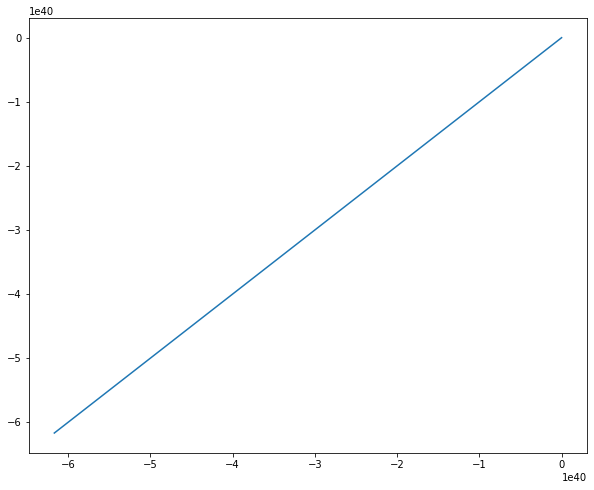

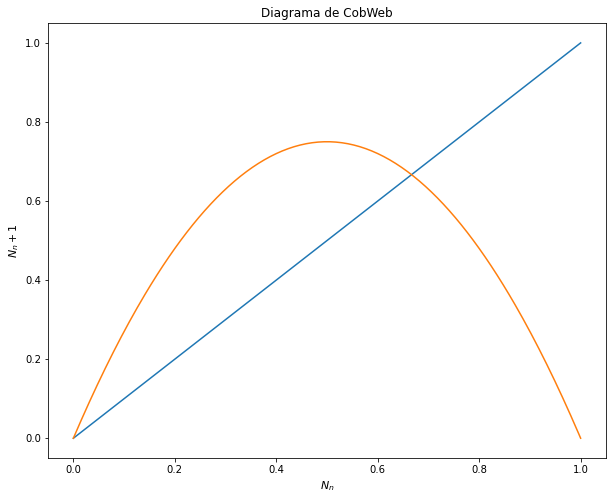

In [154]:
plt.plot(np.asarray(x),np.asarray(y));
GrafLogistic_map(R);

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** Modificar el código del diagrama de bifurcación para que use nuestras funciones.
</div>

In [122]:
import math
from PIL import Image

def DiaBifurcacion(g):
    imgx = 1000
    imgy = 500
    image = Image.new("RGB", (imgx, imgy))
    
    xa = 1
    xb = 4
    maxit = 5000
    
    for i in range(imgx):
        r = xa + (xb - xa) * float(i) / (imgx - 1)
        x = 0.5
        for j in range(maxit):
            x = g(x,r)
            if j > maxit / 2:
                image.putpixel((i, int(x * imgy)), (255, 255, 255))
    
    image.save("bifurcacion.png", "PNG")

<div class="alert alert-info">

**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [124]:
def Mapeo1(x,mu):
    return 1 - mu*x**2

DiaBifurcacion(Mapeo1)

IndexError: image index out of range

## Triángulo de Sierpinski

<div class="alert alert-info">
    
**Ejercicio** Genera de la misma manera el [Triángulo de Sierpinski](http://en.wikipedia.org/wiki/Sierpinski_triangle)

</div>

In [131]:
# %load TrianguloSierpinski

import numpy as np
import matplotlib.pyplot as plt

class TrianguloSierpinski:
    def __init__(self, x1, y1, x2, y2, x3, y3):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.x3 = x3
        self.y3 = y3
    
    def _generar(self, x1, y1, x2, y2, x3, y3, iteracion):
        
        if iteracion == 0:
            self.dibujar(x1, y1, x2, y2, x3, y3)
            
        elif iteracion >= 0:
            x12 = (x2 + x1)/2
            y12 = (y2 + y1)/2
            
            x13 = (x3 + x1)/2
            y13 = (y3 + y1)/2
            
            x23 = (x3 + x2)/2
            y23 = (y3 + y2)/2
            
            self._generar(x1, y1, x12, y12, x13, y13, iteracion - 1)
            self._generar(x13, y13, x3, y3, x23, y23, iteracion - 1)
            self._generar(x12, y12, x23, y23, x2, y2, iteracion - 1)
            
    def dibujar(self, x1, y1, x2, y2, x3, y3):
        plot([x1, x2, x3, x1], [y1, y2, y3, y1], lw=1.0, color='blue')

    def generar(self, iteraciones=0):
        return self._generar(self.x1, self.y1, self.x2, self.y2, self.x3, self.y3, iteraciones)


In [136]:
T = TrianguloSierpinski(0,0,2,0,1,2)

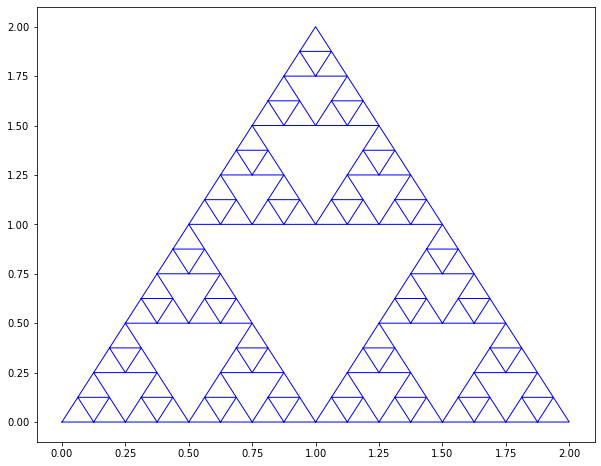

In [137]:
T.generar(iteraciones = 4)